# Regularización para regresión y clasificación

## Regresión regularizada
Para ilustrar la regularización usando Ridge y Lasso, vamos a ajustar estos algoritmos a los datos del fichero `datos_regularizacion.csv` disponible en el aula virtual.

Cargad los datos en un dataframe llamado `datos`.


In [1]:
# Completar aquí
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DATA_DIRECTORY: Path = Path("../data")

datos = pd.read_csv(DATA_DIRECTORY / "datos_regularizacion.csv")

# --------------------
datos

,x,y
0,-0.031161,1.532027
1,0.032386,0.758267
2,0.122271,1.048393
3,0.230400,1.066580
4,0.242299,1.373395
5,0.318407,-1.144595
6,0.367820,-1.241243
7,0.428989,-1.652124
8,0.474160,-1.085733
9,0.538686,0.077627


Llevad a cabo la representación gráfica del conjunto

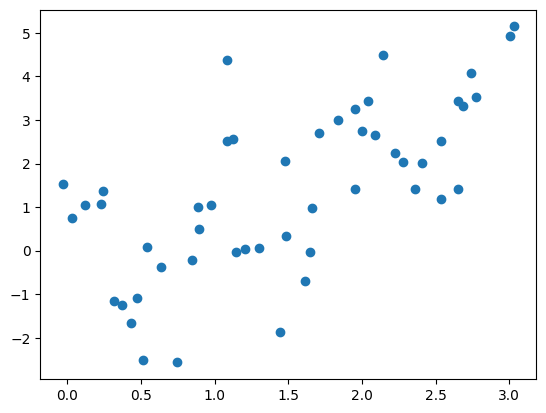

In [2]:
# Completar aquí
fig, ax = plt.subplots()
ax.scatter(datos["x"], datos["y"])
plt.show()

# --------------------

Ajustad una regresión lineal usando términos polinomiales de hasta grado 10. Después de incluir las características correspondientes a los términos de grado 10, llevad a cabo la estanderización de las características. 
Representad la curva ajustada en la gráfica anterior.

[]

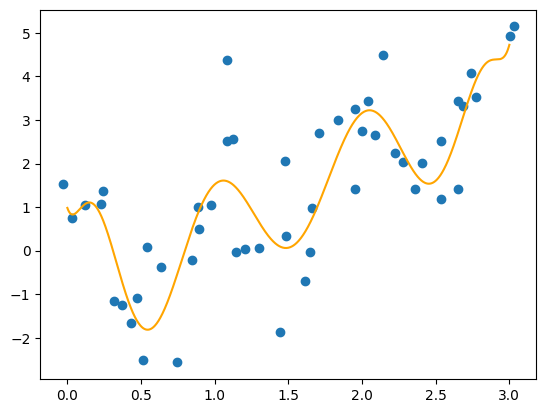

In [3]:
# Completar aquí
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipe = Pipeline(
    [
        ("transform", PolynomialFeatures(degree=10, include_bias=False)),
        ("estand", StandardScaler()),
        ("regresion", LinearRegression()),
    ]
)

x = datos["x"].values.reshape(-1, 1)
y = datos["y"].values

reg = np.linspace(0.0, 3.0, 1000)

lin = pipe.fit(x, y)
y_pred = lin.predict(reg.reshape(-1, 1))

fig, ax = plt.subplots()
ax.scatter(datos["x"], datos["y"])
ax.plot(reg, y_pred, color="orange")
ax.plot()

# --------------------

## Ajuste de una Ridge regression con `alpha=1`
Usando la clase `Ridge` del submódulo `linear_model`, aplicad a los datos una regresión ridge con `alpha=1` usando, al igual que en el apartado anterior, términos polinomiales de grado 10.


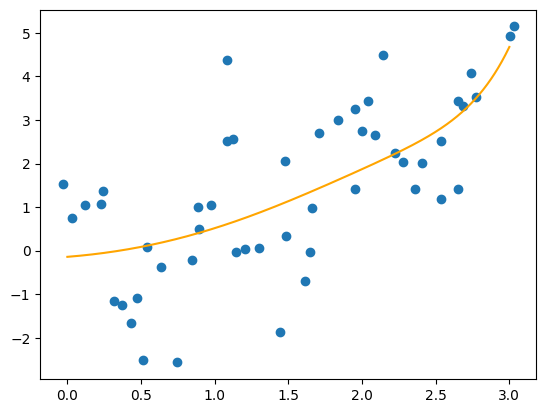

In [4]:
# Completar aquí
from sklearn.linear_model import Ridge

pipe = Pipeline(
    [
        ("transform", PolynomialFeatures(degree=10, include_bias=False)),
        ("estand", StandardScaler()),
        ("regresion", Ridge(1.0)),
    ]
)

ridge = pipe.fit(x,y)
y_p = ridge.predict(reg.reshape(-1,1))

fig, ax = plt.subplots()
ax.plot(reg, y_p, color="orange")
ax.scatter(datos["x"],datos["y"])
plt.show()


# --------------------

## Variamos `alpha` 
Representad los ajustes correspondientes a `alpha=0`, `alpha=0.00001`, `alpha=1` en la misma gráfica.
> Consejo: podéis usar un bucle sobre los valores de `alpha`, usando el método `set_params` que se puede aplicar a un estimador para cambiar algunos de sus parámetros (en este caso `alpha`)

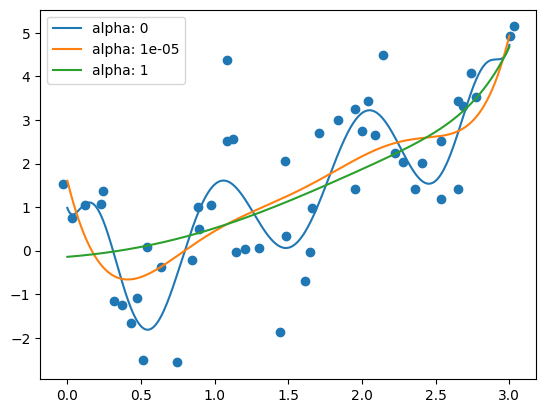

In [5]:
# Completar aquí
alphas = [0, 0.00001, 1]

fig, ax = plt.subplots()
ax.scatter(datos["x"], datos["y"])

for i in alphas:
    pipe["regresion"].set_params(alpha=i)
    ridge = pipe.fit(x, y)
    y_pred = ridge.predict(reg.reshape(-1, 1))
    ax.plot(reg, y_pred, label=f"alpha: {i}")
# --------------------
ax.legend()

# --------------------

# Clasificación regularizada: ejemplo con el conjunto MNIST
MNIST es un conjunto de datos muy clásico en machine learning que consiste en imágenes de dígitos escritos a mano en sobres. Las imágenes tienen una resolución de 28 por 28 píxeles, por lo que cada imagen tiene 784 características, cada característica corresponde a la intensidad de gris del pixel correspondiente, va desde 0 (blanco) a 255 (negro).

MNIST está disponible para descargar desde `sklearn`, pero vamos a cargar una versión reducida con 10000 imágenes, el fichero se llama `mnist_784.10000.csv` y está disponible en el aula virtual. Usad el parámetro `dtype` en `read_csv` para especificar que la columna `y` es de tipo `str`.

In [6]:
# Completar aquí: cargar los datos en un conjunto mnist
mnist = pd.read_csv((DATA_DIRECTORY / 'mnist_784_10000.csv'),
    sep=',',
    dtype = {'y': str}
)
                   
# --------------------
mnist

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


Crear la `Series` `y` el `DataFrame` `X` 

In [7]:
# Completar aquí
X = mnist.drop(columns = ['y'])
y = mnist['y']

# --------------------
print(f"Tamaño de X: {X.shape}, tamaño de y {y.shape}")

Tamaño de X: (10000, 784), tamaño de y (10000,)


Si queréis trabajar con el conjunto completo, se puede descargar directamente desde `sklearn`, tened en cuenta que los tiempos de ejecución son más largos.

In [8]:
# Si queréis trabajar con el conjunto completo:
#from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1)
# # el resultado es un diccionario, dos claves importantes son data y target
#X, y = mnist['data'], mnist['target']
# print(f'Tamaño de X: {X.shape}, tamaño de y {y.shape}')

Podemos visualizar una de las imágenes:

Etiqueta: 3


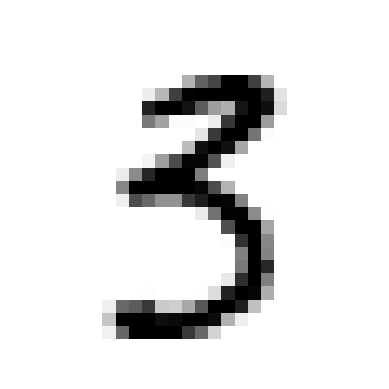

In [9]:
# nada que completar
from matplotlib import cm

fig, ax = plt.subplots()
imagen = X.iloc[3600, :].values.reshape(28, 28)
ax.imshow(imagen, cmap=cm.binary, interpolation="nearest")
ax.axis("off")
print(f"Etiqueta: {y.iloc[3600]}")

Representamos 10 imágenes escogidas al azar de cada etiqueta:

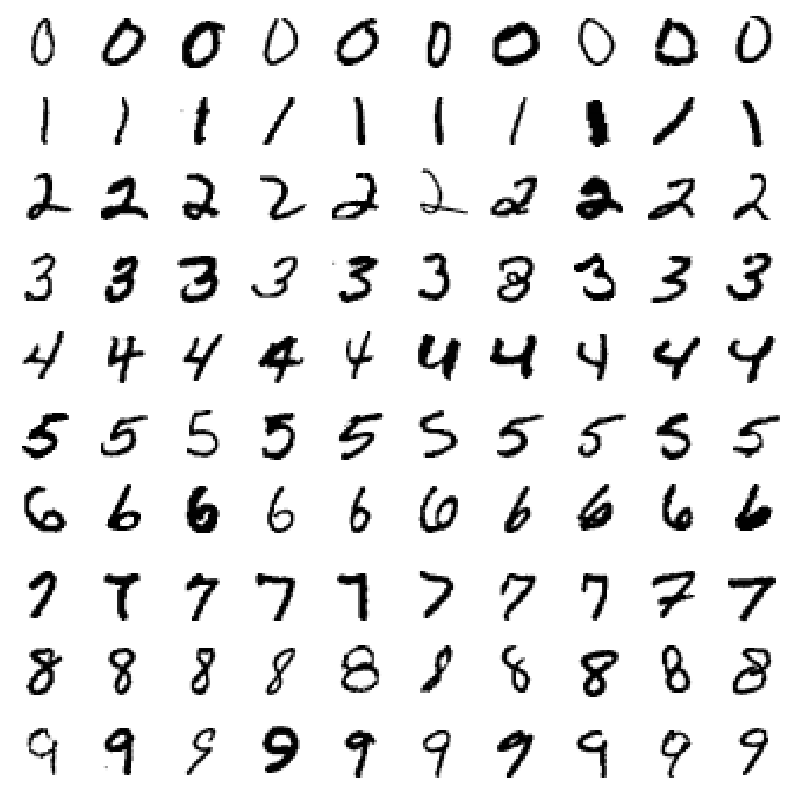

In [10]:
# Nada que completar
from numpy.random import default_rng

rng = default_rng(314)
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    indexes = rng.choice(X[y == str(i)].index, replace=False, size=10)
    for j in range(10):
        imagen = X.loc[indexes[j], :].values.reshape(28, 28)
        axes[i, j].imshow(imagen, cmap=cm.binary, interpolation="nearest")
        axes[i, j].axis("off");

## Separación conjunto de aprendizaje, conjunto de test
Lo primero que vamos a hacer es apartar un subconjunto de test.  Vamos a usar para ello `StratifiedShuffleSplit` del submódulo `model_selection`, que hace una separación (split) aleatoria, pero de manera que las dos partes generadas contengan proporciones parecidas de los valores de `y`. 

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# Empezamos por crear el objeto que realizará el split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=314)
for train_index, test_index in split.split(X, y):
    X_train, y_train = X.loc[train_index].values, y.loc[train_index].values
    X_test, y_test = X.loc[test_index].values, y.loc[test_index].values

Comprobad que se ha respetado la proporción de las etiquetas tanto en el conjunto train como en el conjunto test.

In [12]:
# Completar aquí
print(pd.Series(y_train).value_counts(normalize=True))

# --------------------

0    0.1
7    0.1
9    0.1
1    0.1
4    0.1
3    0.1
6    0.1
5    0.1
2    0.1
8    0.1
Name: proportion, dtype: float64


## Aplicación de la regresión logística con penalización l2
> No se trata de un problema de clasificación binario sino multiclases (10). El algoritmo `LogisticRegression` aplica automáticamente la estrategia de "One Versus all"

Siguiendo lo realizado en la práctica anterior, realizad sobre el conjunto de aprendizaje la predicción con penalización l2, usando el defecto de `C=1`, a través de validación cruzada. Antes de aplicar la regresión logística, estanderizad las características.
Guardad el resultado de las predicciones en `y_train_pred`.

> NOTA: para evitar un warning sobre convergencia, probad a aumentar el número 
máximo de iteraciones en `LogisticRegression` a través del argumento `max_iter`.

In [13]:
# Completar aquí
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

pipe2 = Pipeline(
    [
        ('estand', StandardScaler()),
        ('regresion', LogisticRegression(penalty = 'l2', max_iter = 2000))
    ]
)

y_train_pred = cross_val_predict(pipe2, X_train, y_train, cv = 5)

# --------------------
y_train_pred[:15]

array(['0', '7', '9', '9', '1', '4', '1', '7', '3', '6', '4', '9', '4',
       '0', '1'], dtype=object)

Construid la matriz de confusión y asignadla a un objeto llamado `matriz_confusion`.

In [14]:
# Completar aquí

matriz_confusion = confusion_matrix(y_train, y_train_pred)


# --------------------
matriz_confusion

array([[745,   0,  11,   5,   3,  18,   5,   3,   5,   5],
       [  1, 771,   4,   5,   2,   2,   1,   2,   9,   3],
       [  8,  12, 682,  20,  17,   8,  18,  12,  19,   4],
       [  5,  12,  26, 668,   1,  33,   2,  18,  26,   9],
       [  3,   5,   9,   1, 699,   5,   9,  10,  16,  43],
       [ 15,   7,   7,  28,  12, 678,  15,   5,  26,   7],
       [  6,   5,  13,   1,  16,  18, 736,   0,   5,   0],
       [  3,   8,  11,   9,  14,   1,   1, 719,   1,  33],
       [  5,  13,  14,  34,   8,  45,   4,   4, 657,  16],
       [  7,   3,   6,  15,  37,   9,   1,  25,   7, 690]])

Obtened la tasa de acierto del algoritmo. Para ello, podeís usar `numpy.trace` para obtener la traza de una matriz y por otra parte, compararlo con el resultado del método `accuracy_score` del súbmodulo `metrics`.

In [15]:
# Completar aquí
from sklearn.metrics import accuracy_score

tr = np.trace(matriz_confusion) / X_train.shape[0]

ac = accuracy_score(y_train, y_train_pred)

print(f"La tasa de acierto calculada a partir de la traza es {tr}")
print(f"La misma tasa calculada usando el método accuracy_score es {ac}")


La tasa de acierto calculada a partir de la traza es 0.880625
La misma tasa calculada usando el método accuracy_score es 0.880625


Vamos a calcular ahora la precisión. Al tratarse de un clasificación multiclases, lo que calculamos es la precisión para cada clase y hacemos el promedio de los 10 valores obtenidos.
Usando la matriz de confusión, calculad la precisión para cada clase (de 0 a 9). 
> Consejo: podéis usar el método `diagonal` aplicado a un array numpy para extraer los elementos diagonales y  `np.divide` para hacer la división de dos arrays, elemento a elemento

In [16]:
# Completar aquí
p_c = np.divide(matriz_confusion.diagonal(), matriz_confusion.sum(axis = 0)).mean()
# --------------------

Calculad la precision promedio sobre clases.


In [17]:
# Completar aquí
p_c

np.float64(0.8804896869802057)

Repetid estos cálculos para conseguir la sensibilidad promedio sobre clases

In [18]:
# Completar aquí
s_c = np.divide(matriz_confusion.diagonal(), matriz_confusion.sum(axis = 1)).mean()
print(f"La sensibilidad promedio sobre las clases es {s_c}")

La sensibilidad promedio sobre las clases es 0.880625


En realidad, podríamos haber calculado directamente estos valores promedios usando `precision_score` y `recall_score` del submódulo `metrics`, con el parámetro `average="macro"`

In [19]:
# Completar aquí
from sklearn.metrics import precision_score, recall_score
puntuacion_precision = precision_score(y_true = y_train, y_pred = y_train_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_train, y_pred = y_train_pred, average = 'macro')
# --------------------

print(f"Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}")
print(f"Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}")

Usando precision_score, la precisión promedio sobre clases es 0.8804896869802057
Usando recall_score, la sensibilidad promedio sobre clases es 0.880625


Calculad la precisión y la sensibilidad promedio que obtenemos aplicando sobre el conjunto de test el modelo entrenado con el conjunto de aprendizaje.

In [20]:
# Completar aquí
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)

puntuacion_precision = precision_score(y_true = y_test, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'macro')

# --------------------

print(f"La precisión promedio sobre clases es {puntuacion_precision}")
print(f"La sensibilidad promedio sobre clases es {puntuacion_recall}")


La precisión promedio sobre clases es 0.8855058416914148
La sensibilidad promedio sobre clases es 0.8845000000000001


## Búsqueda del mejor valor de `C` para la regresión logística regularizada.
Usad `GridSearchCV` para decidir qué valor de `C` fijar entre las siguientes posibilidades:
0.005, 0.01, 0.05, 0.1, 1.
> Recordad que para el problema de clasificación, el parámetro `scoring` debe tomar el valor 'accuracy'.

In [21]:
# Completar aquí
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator = pipe2,
    param_grid = {
        'regresion__C': [0.005, 0.01, 0.05, 0.1, 1],
    },
    cv = 5,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)

# --------------------
grid_search


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estand', StandardScaler()),
                                       ('regresion',
                                        LogisticRegression(max_iter=2000))]),
             param_grid={'regresion__C': [0.005, 0.01, 0.05, 0.1, 1]},
             scoring='accuracy')

Cuál es el valor de `C` que corresponde al mejor modelo? Corresponde a más o menos regularización que la opción por defecto de `LogisticRegression`?

Calculad, para el mejor modelo, la precisión promedio y la sensibilidad promedio sobre las clases, usando para empezar el conjunto de aprendizaje y a continuación el conjunto de test


In [22]:
# Completar aquí
grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_train)

puntuacion_precision = precision_score(y_true = y_train, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_train, y_pred = y_pred, average = 'macro')

print("---------------------------------------------------------")
print("Para el conjunto de aprendizaje, usando el mejor modelo:")
print(f"Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}")
print(f"Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}")


y_pred = grid_search.best_estimator_.predict(X_test)

puntuacion_precision = precision_score(y_true = y_test, y_pred = y_pred, average = 'macro')
puntuacion_recall = recall_score(y_true = y_test, y_pred = y_pred, average = 'macro')

print("---------------------------------------------------------")
print("Para el conjunto de test, usando el mejor modelo:")
print(f"Usando precision_score, la precisión promedio sobre clases es {puntuacion_precision}")
print(f"Usando recall_score, la sensibilidad promedio sobre clases es {puntuacion_recall}")

# --------------------

---------------------------------------------------------
Para el conjunto de aprendizaje, usando el mejor modelo:
Usando precision_score, la precisión promedio sobre clases es 0.9508961646185495
Usando recall_score, la sensibilidad promedio sobre clases es 0.9508750000000001
---------------------------------------------------------
Para el conjunto de test, usando el mejor modelo:
Usando precision_score, la precisión promedio sobre clases es 0.9182307892612462
Usando recall_score, la sensibilidad promedio sobre clases es 0.9179999999999999
